In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from humanfriendly import format_timespan

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('./export_11620080/activities.csv')

In [9]:
df.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,...,"<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count"">Jump Count</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit"">Total Grit</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow"">Avg Flow</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.flagged"">Flagged</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_elapsed_speed"">Avg Elapsed Speed</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.dirt_distance"">Dirt Distance</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.newly_explored_distance"">Newly Explored Distance</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.newly_explored_dirt_distance"">Newly Explored Dirt Distance</span>","<span class=""translation_missing"" title=""translation missing: en-US.lib.export.portability_exporter.activities.horton_values.sport_type"">Sport Type</span>",activity_date
0,405687930,"Oct 3, 2015, 9:41:14 PM",Afternoon Run at Prospect Park,Run,NaN,1802,5.83,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-03 21:41:14
1,406566915,"Oct 4, 2015, 10:52:47 PM",Evening Run Before Movie,Run,NaN,1117,3.08,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-04 22:52:47
2,407791541,"Oct 6, 2015, 10:12:20 PM",Evening Run Before Movie Coming Home,Run,NaN,2956,8.89,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06 22:12:20
3,410084195,"Oct 10, 2015, 1:30:56 PM",Morning Run at Presque Isle,Run,NaN,3866,10.75,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-10 13:30:56
4,410891545,"Oct 11, 2015, 2:33:39 PM",Light Morning Jog at Presque Isle with shushu,Run,NaN,1930,5.66,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-11 14:33:39


In [8]:
df['activity_date'] = pd.to_datetime(df['Activity Date'], infer_datetime_format=True)

In [21]:
cols = df.columns.values.tolist()
for k, v in enumerate(cols):
    print(k, v)

0 Activity ID
1 Activity Date
2 Activity Name
3 Activity Type
4 Activity Description
5 Elapsed Time
6 Distance
7 Max Heart Rate
8 Relative Effort
9 Commute
10 Activity Gear
11 Filename
12 Athlete Weight
13 Bike Weight
14 Elapsed Time.1
15 Moving Time
16 Distance.1
17 Max Speed
18 Average Speed
19 Elevation Gain
20 Elevation Loss
21 Elevation Low
22 Elevation High
23 Max Grade
24 Average Grade
25 Average Positive Grade
26 Average Negative Grade
27 Max Cadence
28 Average Cadence
29 Max Heart Rate.1
30 Average Heart Rate
31 Max Watts
32 Average Watts
33 Calories
34 Max Temperature
35 Average Temperature
36 Relative Effort.1
37 Total Work
38 Number of Runs
39 Uphill Time
40 Downhill Time
41 Other Time
42 Perceived Exertion
43 activity_date


In [20]:
# df.drop([43, 84])
# drop not meaningful columns
df = df.drop(df.iloc[:, 43:84],axis = 1)

In [23]:
df.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,...,Max Temperature,Average Temperature,Relative Effort.1,Total Work,Number of Runs,Uphill Time,Downhill Time,Other Time,Perceived Exertion,activity_date
0,405687930,"Oct 3, 2015, 9:41:14 PM",Afternoon Run at Prospect Park,Run,NaN,1802,5.83,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-03 21:41:14
1,406566915,"Oct 4, 2015, 10:52:47 PM",Evening Run Before Movie,Run,NaN,1117,3.08,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-04 22:52:47
2,407791541,"Oct 6, 2015, 10:12:20 PM",Evening Run Before Movie Coming Home,Run,NaN,2956,8.89,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-06 22:12:20
3,410084195,"Oct 10, 2015, 1:30:56 PM",Morning Run at Presque Isle,Run,NaN,3866,10.75,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-10 13:30:56
4,410891545,"Oct 11, 2015, 2:33:39 PM",Light Morning Jog at Presque Isle with shushu,Run,NaN,1930,5.66,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-11 14:33:39


In [25]:
# select date range in 2022
mask = (df['activity_date'] > '2022-01-01') & (df['activity_date'] <= '2022-12-31')
df = df.loc[mask]

In [28]:
df

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,Filename,Athlete Weight,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Average Positive Grade,Average Negative Grade,Max Cadence,Average Cadence,Max Heart Rate.1,Average Heart Rate,Max Watts,Average Watts,Calories,Max Temperature,Average Temperature,Relative Effort.1,Total Work,Number of Runs,Uphill Time,Downhill Time,Other Time,Perceived Exertion,activity_date
1045,6474639127,"Jan 5, 2022, 3:02:23 AM","Fitbod - Chest, Triceps, Abs, Shoulders",Weight Training,"399.0 Calories, 10 Exercises, 14,240 lb lifted",4602,0,NaN,NaN,False,NaN,activities/6884158702.tcx.gz,NaN,NaN,4602.0,4602.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-05 03:02:23
1046,6479582766,"Jan 6, 2022, 3:01:32 AM","Fitbod - Back, Biceps, Trapezius, Abs, Lower Back",Weight Training,"405.0 Calories, 11 Exercises, 16,425 lb lifted",4749,0,NaN,NaN,False,NaN,activities/6889432262.tcx.gz,NaN,NaN,4749.0,4749.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-06 03:01:32
1047,6484530431,"Jan 7, 2022, 2:04:13 AM","Fitbod - Glutes, Adductors, Abs, Abductors",Weight Training,"232.0 Calories, 7 Exercises, 22,680 lb lifted",3428,0,NaN,NaN,False,NaN,activities/6894716769.tcx.gz,NaN,NaN,3428.0,3428.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-07 02:04:13
1048,6492774176,"Jan 8, 2022, 6:05:28 PM","Fitbod - Chest, Shoulders, Triceps, Abs",Weight Training,"351.0 Calories, 9 Exercises, 9,300 lb lifted",4157,0,NaN,NaN,False,NaN,activities/6903578879.tcx.gz,NaN,NaN,4157.0,4157.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-08 18:05:28
1049,6498043867,"Jan 9, 2022, 4:07:09 PM","Fitbod - Biceps, Back, Lower Back, Forearms, Abs",Weight Training,"329.0 Calories, 10 Exercises, 12,260 lb lifted...",5009,0,NaN,NaN,False,NaN,activities/6909236266.tcx.gz,NaN,NaN,5009.0,5009.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-09 16:07:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,8246064968,"Dec 14, 2022, 1:44:33 AM","Fitbod - Triceps, Biceps",Weight Training,"397.0 Calories, 10 Exercises, 15,720 lb lifted",4244,0,NaN,NaN,False,NaN,activities/8837167642.tcx.gz,NaN,NaN,4244.0,4244.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-14 01:44:33
1343,8249132622,"Dec 14, 2022, 8:15:09 PM","Fitbod - Glutes, Quadriceps, Abs, Adductors, L...",Workout,"360.0 Calories, 10 Exercises, 15,840 lb lifted",3801,0,NaN,NaN,False,NaN,activities/8840595576.tcx.gz,NaN,NaN,3801.0,3801.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-14 20:15:09
1344,8249661928,"Dec 15, 2022, 12:00:55 AM",Evening Run - Downtown CC Run Club,Run,With Franki,1854,5.03,NaN,NaN,False,NaN,activities/8249661928.gpx,NaN,NaN,1854.0,1813.0,5036.149902,4.173999,2.777799,2.400000,2.400000,1.000000,3.800000,12.570780,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-15 00:00:55
1345,8253444775,"Dec 16, 2022, 12:26:04 AM",Holiday Themed Run with DRG,Run,NaN,2433,4.84,NaN,NaN,False,NaN,activities/8253444775.gpx,NaN,NaN,2433.0,1703.0

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Weight Training'),
  Text(1, 0, 'Run'),
  Text(2, 0, 'Workout'),
  Text(3, 0, 'Hike'),
  Text(4, 0, 'Yoga'),
  Text(5, 0, 'Kayaking'),
  Text(6, 0, 'Walk'),
  Text(7, 0, 'Ride')])

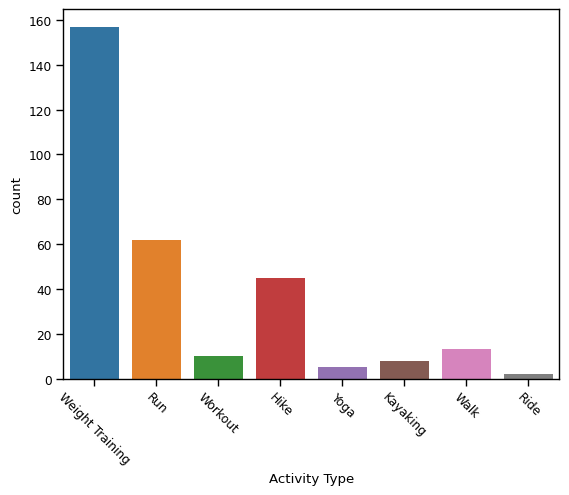

In [39]:
sns.countplot(x='Activity Type', data=df)
plt.xticks(rotation=-45)

In [33]:
# number of activities
len(df)

302

In [48]:
# number of active days
len(df.groupby([df['activity_date'].dt.date]))

218

In [59]:
# need to transform Distance column from default (km) to miles
df = df.astype({'Distance':'float'})
df['distance_mile'] = df['Distance'] * 0.621371

In [61]:
# longest distance activity based on activity type
df.groupby(['Activity Type'], sort=False)['distance_mile'].max()

Activity Type
Weight Training     0.000000
Run                13.272485
Workout             2.895589
Hike               16.491186
Yoga                0.000000
Kayaking            4.709992
Walk                9.109299
Ride               29.359780
Name: distance_mile, dtype: float64

In [67]:
# list those mx activities?
# get temp subset of activities because yoga and weight training doesn't have distance
df_distance = df[df['distance_mile'] > 0]
idx = df_distance.groupby(['Activity Type'])['distance_mile'].transform(max) == df_distance['distance_mile']
df_distance[idx]

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,Filename,Athlete Weight,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Average Positive Grade,Average Negative Grade,Max Cadence,Average Cadence,Max Heart Rate.1,Average Heart Rate,Max Watts,Average Watts,Calories,Max Temperature,Average Temperature,Relative Effort.1,Total Work,Number of Runs,Uphill Time,Downhill Time,Other Time,Perceived Exertion,activity_date,distance_mile
1099,6855522441,"Mar 20, 2022, 4:00:32 PM",Orange Theory Fitness @ Quarry,Workout,Forgot apple watch,3600,4.66,NaN,NaN,False,NaN,NaN,NaN,NaN,3600.0,3600.0,4667.100098,NaN,1.296417,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-20 16:00:32,2.895589
1127,6993873215,"Apr 16, 2022, 10:02:50 PM",Evening Kayaking on Lady Bird Lake,Kayaking,NaN,9599,7.58,NaN,NaN,False,NaN,activities/6993873215.gpx,NaN,NaN,9599.0,6571.0,7584.620117,5.227857,1.154257,10.324402,0.924400,129.199997,140.500000,25.411283,0.123935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04-16 22:02:50,4.709992
1253,7819014539,"Sep 16, 2022, 1:21:41 PM","Rim to River to Rim via South Kaibab, Bright A...",Hike,NaN,25449,26.54,NaN,NaN,False,NaN,activities/7819014539.gpx,NaN,NaN,25449.0,20948.0,26547.210938,5.436914,1.267291,1449.818726,1555.119995,754.599976,2192.899902,49.823910,-0.396652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-16 13:21:41,16.491186
1276,8004915309,"Oct 23, 2022, 12:59:48 AM",Evening Walk,Walk,NaN,12865,14.66,NaN,NaN,False,NaN,activities/8004915309.gpx,NaN,NaN,12865.0,12328.0,14667.781250,1.800000,1.189794,53.271328,52.671299,131.500000,150.300003,7.843137,0.004091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-23 00:59:48,9.109299
1301,8107727327,"Nov 12, 2022, 2:00:25 PM",Wonderland Trail Half Marathon,Run,NaN,10101,21.36,NaN,NaN,False,NaN,activities/8107727327.gpx,NaN,NaN,10101.0,9616.0,21367.373047,3.588406,2.222065,273.665833,272.966003,202.100006,247.100006,16.110054,0.003278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-12 14:00:25,13.272485
1331,8203075188,"Dec 3, 2022, 3:01:33 PM",Jaguar Memorial Ride for Wounded Warriors Project,Ride,NaN,11823,47.25,NaN,NaN,False,Rental,activities/8788182115.fit.gz,NaN,7.25748,11823.0,9997.0,47250.058594,8.487386,4.726424,254.200012,247.600006,232.800003,315.200012,13.470490,0.013968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,743.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-03 15:01:33,29.359780


In [53]:
# longest elapsed time activity based on activity type
df.groupby(['Activity Type'], sort=False)['Elapsed Time'].max()

Activity Type
Weight Training     8906
Run                10101
Workout             3801
Hike               25449
Yoga                3607
Kayaking           12252
Walk               12865
Ride               11823
Name: Elapsed Time, dtype: int64

In [71]:
# what are the longest activities based on time
# also need to convert time to hours and minutes,  raw data is in seconds
df['friendly_time'] = df['Elapsed Time'].apply(lambda x: format_timespan(x))
idx = df.groupby(['Activity Type'])['Elapsed Time'].transform(max) == df['Elapsed Time']
df[idx]

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,Filename,Athlete Weight,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Average Positive Grade,Average Negative Grade,Max Cadence,Average Cadence,Max Heart Rate.1,Average Heart Rate,Max Watts,Average Watts,Calories,Max Temperature,Average Temperature,Relative Effort.1,Total Work,Number of Runs,Uphill Time,Downhill Time,Other Time,Perceived Exertion,activity_date,distance_mile,friendly_time
1052,6539455036,"Jan 17, 2022, 3:59:00 PM","Fitbod - Back, Biceps, Abs, Lower Back",Weight Training,"396.0 Calories, 10 Exercises, 18,050 lb lifted",8906,0.00,NaN,NaN,False,NaN,activities/6953562320.tcx.gz,NaN,NaN,8906.0,8906.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-17 15:59:00,0.000000,"2 hours, 28 minutes and 26 seconds"
1109,6902297710,"Mar 29, 2022, 3:30:46 PM",Yoga @ Black Swan,Yoga,NaN,3607,0.00,NaN,NaN,False,NaN,activities/7344116564.fit.gz,NaN,NaN,3607.0,3607.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-29 15:30:46,0.000000,1 hour and 7 seconds
1171,7217702231,"May 28, 2022, 2:17:24 PM",Morning Kayaking,Kayaking,NaN,12252,4.62,NaN,NaN,False,NaN,activities/7217702231.gpx,NaN,7.25748,12252.0,5364.0,4627.397461,2.057143,0.862677,0.000000,-0.800000,-0.200000,1.600000,5.600000,0.017313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-05-28 14:17:24,2.870734,"3 hours, 24 minutes and 12 seconds"
1253,7819014539,"Sep 16, 2022, 1:21:41 PM","Rim to River to Rim via South Kaibab, Bright A...",Hike,NaN,25449,26.54,NaN,NaN,False,NaN,activities/7819014539.gpx,NaN,NaN,25449.0,20948.0,26547.210938,5.436914,1.267291,1449.818726,1555.119995,754.599976,2192.899902,49.823910,-0.396652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-16 13:21:41,16.491186,"7 hours, 4 minutes and 9 seconds"
1276,8004915309,"Oct 23, 2022, 12:59:48 AM",Evening Walk,Walk,NaN,12865,14.66,NaN,NaN,False,NaN,activities/8004915309.gpx,NaN,NaN,12865.0,12328.0,14667.781250,1.800000,1.189794,53.271328,52.671299,131.500000,150.300003,7.843137,0.004091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-23 00:59:48,9.109299,"3 hours, 34 minutes and 25 seconds"
1301,8107727327,"Nov 12, 2022, 2:00:25 PM",Wonderland Trail Half Marathon,Run,NaN,10101,21.36,NaN,NaN,False,NaN,activities/8107727327.gpx,NaN,NaN,10101.0,9616.0,21367.373047,3.588406,2.222065,273.665833,272.966003,202.100006,247.100006,16.110054,0.003278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-12 14:00:25,13.272485,"2 hours, 48 minutes and 21 seconds"
1331,8203075188,"Dec 3, 2022, 3:01:33 PM",Jaguar Memorial Ride for Wounded Warriors Project,Ride,NaN,11823,47.25,NaN,NaN,False,Rental,activities/8788182115.fit.gz,NaN,7.25748,11823.0,9997.0,47250.058594,8.487386,4.726424,254.200012,247.600006,232.800003,315.200012,13.470490,0.013968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,743.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-03 15:01:33,29.359780,"3 hours, 17 minutes and 3 seconds"
1343,8249132622,"Dec 14, 2022, 8:15:09 PM","Fitbod - Glutes, Quadriceps, Abs, Adductors, L...",Workout,"360.0 Calories, 10 Exercises, 15,840 lb lifted",3801,0.00,NaN,NaN,False,NaN,activities/8840595576.tcx.gz,NaN,NaN,3801.0,3801.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-14 20:15:09,0.000000,"1 hour, 3 minutes and 21 seconds"
